## Start

In [1]:
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize


# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split


Bad key "text.kerning_factor" on line 4 in
C:\Users\asharma23\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data=pd.read_csv("Usecase1_Dataset.csv")

In [3]:
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [4]:
data.shape

(11746, 60)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [6]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [7]:
data['ENERGY STAR Score'].value_counts()

Not Available    2104
100               649
1                 299
99                162
80                144
                 ... 
17                 48
12                 47
42                 47
21                 46
11                 44
Name: ENERGY STAR Score, Length: 101, dtype: int64

In [8]:
data.isnull().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                 11
NYC Borough, Block and Lot (BBL) self-reported                   0
NYC Building Identification Number (BIN)                         0
Address 1 (self-reported)                                        0
Address 2                                                        0
Postal Code                                                      0
Street Number                                                  124
Street Name                                                    122
Borough                                                        118
DOF Gross Floor Area                                          

# Convert Data to Correct Types

In [9]:

# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [10]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

### Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column. 

In [11]:
# Total missing values
mis_val = data.isnull().sum()
        
# Percentage of missing values
mis_val_percent = 100 * data.isnull().sum() / len(data)
        
# Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})

mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False).round(1)

,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use - Gross Floor Area (ft²),8005,68.2


In [12]:
missing_df=mis_val_table_ren_columns
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
missing_columns

['Address 2',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'District Steam Use (kBtu)']

In [13]:
# Drop the columns
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns), missing_columns)
data = data.drop(columns = list(missing_columns))

We will remove 11 columns. ['Address 2', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)']


In [14]:
data.shape

(11746, 49)

In [15]:

# from pandas_profiling import ProfileReport
# import pandas_profiling
# profile = pandas_profiling.ProfileReport(data)
# profile.to_file(output_file='output.html')

# profile.to_notebook_iframe()

In [16]:
#From above graphs we can see that few columns have outliers.

In [17]:
data.corr()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
Order,1.000000,0.056637,-0.159678,-0.144426,0.149153,0.060383,0.047864,0.039524,-0.001767,-0.000599,0.007609,0.005976,-0.000778,-0.016628,-0.016861,-0.082624,-0.081981,-0.022600,-0.014744,-0.029175,-0.152684,-0.018974,-0.009898,-0.002060,-0.337621,0.234689,0.469983,0.854093,0.218636
Property Id,0.056637,1.000000,-0.086260,-0.060541,0.068352,0.000859,-0.126301,-0.047020,0.010182,0.009993,0.002688,0.006418,0.010533,-0.009188,-0.009329,-0.054279,-0.055015,-0.006409,-0.008540,0.006082,-0.073214,-0.008996,-0.005026,0.010727,0.025393,0.077825,-0.021354,0.062071,0.014974
DOF Gross Floor Area,-0.159678,-0.086260,1.000000,0.829291,0.103228,0.058583,-0.021242,0.006877,0.019109,0.017061,0.007130,0.014428,0.017751,0.110088,0.114658,0.264046,0.279651,0.117354,0.100678,0.072278,0.828542,0.059734,0.112267,0.023444,0.001391,-0.030588,-0.078634,-0.108475,0.051045
Largest Property Use Type - Gross Floor Area (ft²),-0.144426,-0.060541,0.829291,1.000000,0.081042,0.150296,-0.031043,0.017734,0.009563,0.009192,-0.003154,0.006922,0.009147,0.081086,0.081975,0.293500,0.291917,0.091689,0.073013,0.075441,0.987986,0.058238,-0.011345,0.009314,-0.019929,-0.059212,-0.084811,-0.107610,0.023283
Year Built,0.149153,0.068352,0.103228,0.081042,1.000000,0.004136,0.001829,-0.118181,0.020198,0.020774,0.003964,0.019080,0.021038,0.010556,0.010918,0.037726,0.037055,0.012925,0.009866,0.012042,0.082290,0.019523,0.008480,0.020416,-0.098145,0.008558,-0.039303,0.114223,0.024097
Number of Buildings - Self-reported,0.060383,0.000859,0.058583,0.150296,0.004136,1.000000,0.008121,-0.020564,-0.000421,-0.000455,-0.002741,0.000331,-0.000783,0.007154,0.007328,0.025263,0.025164,0.006662,0.007057,-0.000325,0.146739,0.005048,0.000834,-0.000787,-0.031596,0.005214,0.015907,0.040598,0.012541
Occupancy,0.047864,-0.126301,-0.021242,-0.031043,0.001829,0.008121,1.000000,-0.031116,-0.010646,-0.013070,0.002451,-0.013212,-0.012810,-0.000069,-0.000314,-0.014654,-0.017864,-0.001041,0.000314,-0.004774,-0.033009,-0.038207,-0.028035,-0.010225,0.017700,0.050592,0.079148,0.040034,0.025632
ENERGY STAR Score,0.039524,-0.047020,0.006877,0.017734,-0.118181,-0.020564,-0.031116,1.000000,-0.036123,-0.035227,-0.067762,-0.023008,-0.040913,-0.026170,-0.026215,-0.066330,-0.065789,-0.047934,-0.026355,-0.040326,0.016800,-0.024555,-0.022396,-0.042873,-0.044262,-0.029670,0.064054,0.063185,-0.001607
Site EUI (kBtu/ft²),-0.001767,0.010182,0.019109,0.009563,0.020198,-0.000421,-0.010646,-0.036123,1.000000,0.999645,0.156147,0.980949,0.996574,0.274167,0.283329,0.035173,0.034654,0.297063,0.270755,0.130630,0.011123,-0.000084,0.000414,0.994421,-0.008341,0.011493,-0.008674,0.010331,0.013376
Weather Normalized Site EUI (kBtu/ft²),-0.000599,0.009993,0.017061,0.009192,0.020774,-0.000455,-0.013070,-0.035227,0.999645,1.000000,0.146811,0.983178,0.995697,0.264158,0.273392,0.032499,0.032481,0.286014,0.261562,0.122923,0.010757,-0.000248,0.000304,0.993345,-0.009111,0.011825,-0.009037,0.011931,0.012966


# Outlier Treatment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023FF6B346C8>]],
      dtype=object)

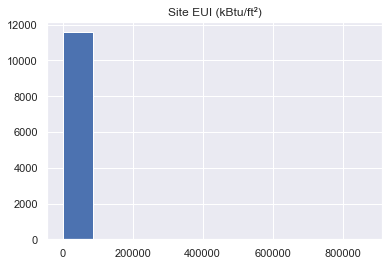

In [18]:
data.hist(column =['Site EUI (kBtu/ft²)'])

In [19]:
data['Site EUI (kBtu/ft²)'].skew()

90.25433904863701

In [20]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023FF6B16088>]],
      dtype=object)

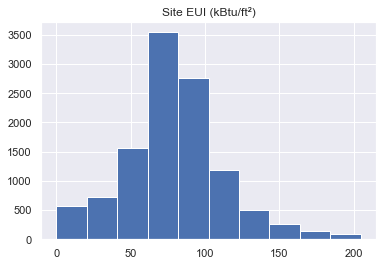

In [21]:
data.hist(column =['Site EUI (kBtu/ft²)'])

In [22]:
data.shape

(11319, 49)

In [23]:
data['Site EUI (kBtu/ft²)'].skew()

0.41170099801946414

In [24]:
data.corr()['ENERGY STAR Score'].sort_values()

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [25]:
data.rename(columns={'ENERGY STAR Score':'score'}, inplace=True)

In [26]:
data.dtypes!='object'

Order                                                          True
Property Id                                                    True
Property Name                                                 False
Parent Property Id                                            False
Parent Property Name                                          False
BBL - 10 digits                                               False
NYC Borough, Block and Lot (BBL) self-reported                False
NYC Building Identification Number (BIN)                      False
Address 1 (self-reported)                                     False
Postal Code                                                   False
Street Number                                                 False
Street Name                                                   False
Borough                                                       False
DOF Gross Floor Area                                           True
Primary Property Type - Self Selected           

In [27]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

C:\Users\asharma23\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\asharma23\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\asharma23\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
correlations[:10]

Site EUI (kBtu/ft²)                             -0.723864
Weather Normalized Site EUI (kBtu/ft²)          -0.713993
sqrt_Site EUI (kBtu/ft²)                        -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)     -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)   -0.671044
sqrt_Source EUI (kBtu/ft²)                      -0.669396
Weather Normalized Source EUI (kBtu/ft²)        -0.645542
Source EUI (kBtu/ft²)                           -0.641037
log_Source EUI (kBtu/ft²)                       -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)    -0.620329
Name: score, dtype: float64

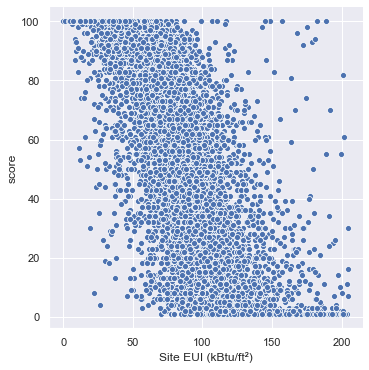

In [29]:
sns.pairplot(y_vars='score', x_vars='Site EUI (kBtu/ft²)', data=features, height=5)

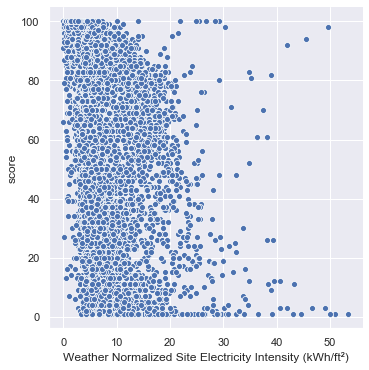

In [30]:
sns.pairplot(y_vars='score', x_vars='Weather Normalized Site Electricity Intensity (kWh/ft²)', 
                 data=data,
             height=5
                 )

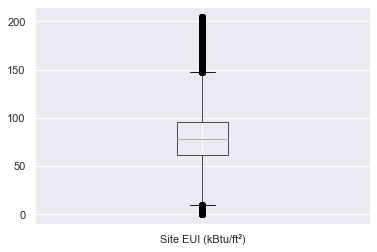

In [31]:
data.boxplot(column =['Site EUI (kBtu/ft²)'])

## Feature Engineering

In [32]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\Users\asharma23\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\asharma23\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(11319, 110)

In [33]:
features.columns

Index(['Order', 'Property Id', 'DOF Gross Floor Area',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy', 'score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       ...
       'Largest Property Use Type_Restaurant',
       'Largest Property Use Type_Retail Store',
       'Largest Property Use Type_Self-Storage Facility',
       'Largest Property Use Type_Senior Care Community',
       'Largest Property Use Type_Social/Meeting Hall',
       'Largest Property Use Type_Strip Mall',
       'Largest Property Use Type_Supermarket/Grocery Store',
       'Largest Property Use Type_Urgent Care/Clinic/Other Outpatient',
       'Largest Property Use Type_Wholesale Club/Supercenter',
       'Largest Property Use Type_Worship Facility'],
      dtype='object', length=110)

## Remove Collinear Features

In [34]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [35]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

C:\Users\asharma23\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


In [36]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

In [37]:
features.shape

(11319, 65)

## Split Into Training and Testing Sets

In [38]:
score = features[features['score'].notnull()]

In [39]:
score.shape

(9461, 65)

In [40]:
score.head()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,log_Direct GHG Emissions (Metric Tons CO2e),log_Water Intensity (All Water Sources) (gal/ft²),Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,...,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,score
12,15,2637863,NaN,1903,2,100,32.0,7.5,0.0,51.01,NaN,NaN,NaN,NaN,5.015954,3.932022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93.0
18,21,2780056,NaN,1939,2,100,76.2,3.5,0.0,18.40,NaN,NaN,NaN,NaN,7.329815,2.912351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72.0
19,22,4988574,179130.0,1939,1,100,75.7,4.0,0.0,NaN,40.857943,-73.934962,12.0,281.0,6.842150,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67.0
20,23,4988569,102150.0,1939,1,100,77.1,2.6,0.0,NaN,40.858256,-73.934734,12.0,281.0,6.377747,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80.0
21,24,2806486,NaN,1911,2,100,68.0,6.1,0.5,NaN,NaN,NaN,NaN,NaN,6.163315,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100.0


In [41]:
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

features.fillna(features.median(), inplace=True)

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


## Model Building

In [42]:
# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler, RobustScaler


# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [43]:
#Scaling of features

In [44]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Convert y to one-dimensional array (vector)
y = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [46]:
pd.DataFrame(X_train).shape

(6622, 64)

In [47]:
score.isna().sum(axis=0).sum()

15181

In [48]:
pd.DataFrame(X_train).isna().sum(axis=0).sum()

0

In [49]:
# Function to calculate root mean squared error
from sklearn.metrics import mean_squared_error 

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true , y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_rmse = rmse(y_test, model_pred)
    
    # Return the performance metric
    return model_rmse

In [50]:
lr = LinearRegression()
lr_rmse = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: RMSE = %0.4f' % lr_rmse)

Linear Regression Performance on the test set: RMSE = 17.0260


In [51]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_rmse = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: RMSE = %0.4f' % random_forest_rmse)

C:\Users\asharma23\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Random Forest Regression Performance on the test set: RMSE = 13.5489


In [52]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_rmse = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: RMSE = %0.4f' % gradient_boosted_rmse)

C:\Users\asharma23\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosted Regression Performance on the test set: RMSE = 13.5797


In [53]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 60,
 'verbose': 0,
 'warm_start': False}

## Random forest is doing good with RMSE, so we can work on this model with hyperparameter tuning

In [54]:
random_forest.feature_importances_

array([1.66966347e-02, 2.17149459e-02, 1.94839084e-02, 1.78334487e-02,
       9.95061142e-04, 1.33722206e-03, 5.97145901e-01, 1.47196191e-01,
       5.78097760e-03, 9.37092510e-03, 1.18104951e-02, 1.11028166e-02,
       6.38315896e-03, 1.25127877e-02, 1.58720327e-02, 9.83580892e-03,
       3.82803916e-05, 0.00000000e+00, 0.00000000e+00, 1.50852956e-06,
       0.00000000e+00, 0.00000000e+00, 6.20161163e-07, 6.27214141e-03,
       0.00000000e+00, 7.98474728e-06, 2.75153129e-03, 2.28138089e-03,
       4.10103655e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.53816540e-05, 0.00000000e+00, 6.38062836e-02, 0.00000000e+00,
       1.20271039e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.88286423e-08,
       0.00000000e+00, 0.00000000e+00, 8.83197591e-06, 0.00000000e+00,
       2.90866556e-04, 0.00000000e+00, 0.00000000e+00, 2.16116359e-04,
      

In [55]:
importances = list(zip(random_forest.feature_importances_, features.columns))
importances.sort(reverse=True)
importances

[(0.5971459013647914, 'Site EUI (kBtu/ft²)'),
 (0.14719619137475007,
  'Weather Normalized Site Electricity Intensity (kWh/ft²)'),
 (0.06380628364128159, 'Largest Property Use Type_Multifamily Housing'),
 (0.02171494585101169, 'Property Id'),
 (0.019483908397322162, 'DOF Gross Floor Area'),
 (0.017833448697927433, 'Year Built'),
 (0.016696634672673797, 'Order'),
 (0.015872032743916808, 'log_Direct GHG Emissions (Metric Tons CO2e)'),
 (0.01251278771527966, 'Census Tract'),
 (0.012027103924975536,
  'Largest Property Use Type_Non-Refrigerated Warehouse'),
 (0.011810495064886338, 'Latitude'),
 (0.01110281661320076, 'Longitude'),
 (0.009835808921074224, 'log_Water Intensity (All Water Sources) (gal/ft²)'),
 (0.00937092509524268, 'Water Intensity (All Water Sources) (gal/ft²)'),
 (0.006383158961338586, 'Community Board'),
 (0.006272141405650706, 'Largest Property Use Type_Distribution Center'),
 (0.005780977597336698,
  'Weather Normalized Site Natural Gas Intensity (therms/ft²)'),
 (0.0041

## END